# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [90]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [91]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Double check some datatypes, and for nulls and duplicates:

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [95]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [96]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [97]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [98]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [99]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region','Postal Code']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region',
    'Postal Code':'postal_code'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [100]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [101]:
query2 = """ SELECT 
    c.customer_name,
    c.customer_id,
    ROUND(SUM(od.sales), 2) AS total_sales
FROM order_details od
JOIN customers c ON c.customer_id = c.customer_id
GROUP BY c.customer_id, c.customer_name
ORDER BY total_sales DESC
LIMIT 10;
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_name,customer_id,total_sales
0,Emily Phan,EP-13915,39052414.63
1,Erin Ashbrook,EA-14035,29863611.18
2,Joel Eaton,JE-15745,29863611.18
3,Sally Hughsby,SH-19975,29863611.18
4,Zuschuss Carroll,ZC-21910,29863611.18
5,Anna Häberlin,AH-10690,27566410.32
6,Chris Cortes,CC-12220,27566410.32
7,Clay Ludtke,CL-12565,27566410.32
8,Damala Kotsonis,DK-12835,27566410.32
9,Edward Hooks,EH-13765,27566410.32


### Which product categories and subcategories are the most profitable overall?

In [102]:
query3 = """ SELECT 
    p.category,
    p.subcategory,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN products p ON p.product_id = p.product_id
GROUP BY p.category, p.subcategory
ORDER BY total_profit DESC; 
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Office Supplies,Paper,81336754.16
1,Office Supplies,Binders,61002565.62
2,Technology,Phones,54129037.10
3,Furniture,Furnishings,53842640.08
4,Office Supplies,Art,46969111.56
5,Technology,Accessories,42100362.19
6,Office Supplies,Storage,38090803.89
7,Office Supplies,Appliances,28353305.15
8,Furniture,Chairs,25202937.91
9,Office Supplies,Labels,20047791.52


### What is the average discount given per category?

In [103]:
query4 = """ SELECT 
    p.category,
    AVG(Discount) AS avg_discount
FROM order_details od
JOIN products p ON p.product_id = p.product_id
GROUP BY p.category
ORDER BY avg_discount DESC; 
"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Technology,0.156203
1,Office Supplies,0.156203
2,Furniture,0.156203


### Which states or regions contribute the most to total sales?

In [104]:
query5 = """ SELECT 
    c.state,
    c.region,
    ROUND(SUM(od.Sales), 2) AS total_sales
FROM order_details od
JOIN customers c ON c.customer_id = c.customer_id
GROUP BY c.state, c.region
ORDER BY total_sales DESC; """
result5 = pd.read_sql(query5, conn)
result5

,state,region,total_sales
0,California,West,2.269634e+09
1,New York,East,1.245083e+09
2,Texas,Central,1.100359e+09
3,Pennsylvania,East,6.455134e+08
4,Illinois,Central,6.202442e+08
5,Washington,West,5.720030e+08
6,Ohio,East,5.352478e+08
7,Florida,South,4.594402e+08
8,North Carolina,South,3.124193e+08
9,Virginia,South,2.641781e+08


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [105]:
query6 = """ SELECT 
    o.order_id,
    o.order_date,
    o.ship_date,
    (julianday(o.ship_date) - julianday(o.order_date)) AS shipping_days
FROM orders o
WHERE julianday(o.ship_date) - julianday(o.order_date) > 3;
"""
result6 = pd.read_sql(query6, conn)
result6

,order_id,order_date,ship_date,shipping_days
0,CA-2013-138688,2013-06-13 00:00:00,2013-06-17 00:00:00,4.0
1,US-2012-108966,2012-10-11 00:00:00,2012-10-18 00:00:00,7.0
2,CA-2011-115812,2011-06-09 00:00:00,2011-06-14 00:00:00,5.0
3,CA-2014-114412,2014-04-16 00:00:00,2014-04-21 00:00:00,5.0
4,CA-2013-161389,2013-12-06 00:00:00,2013-12-11 00:00:00,5.0
...,...,...,...,...
3386,CA-2012-100251,2012-05-17 00:00:00,2012-05-23 00:00:00,6.0
3387,CA-2013-125794,2013-09-30 00:00:00,2013-10-04 00:00:00,4.0
3388,CA-2014-163629,2014-11-18 00:00:00,2014-11-22 00:00:00,4.0
3389,CA-2014-121258,2014-02-27 00:00:00,2014-03-04 00:00:00,5.0


### Which month or year had the highest total sales?

In [106]:
query7 = """
SELECT 
    strftime('%Y-%m', o.order_date) AS month,
    SUM(od.sales) AS total_sales
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
GROUP BY month
ORDER BY total_sales DESC
"""
result7 = pd.read_sql(query7, conn)
result7

,month,total_sales
0,2014-11,112326.4710
1,2013-12,97237.4170
2,2014-09,90488.7220
3,2014-12,90474.6008
4,2013-11,82192.3228
5,2011-09,81777.3508
6,2011-11,78628.7167
7,2014-10,77793.7552
8,2012-11,75972.5635
9,2012-12,74919.5212


### What are the most frequently ordered products?

In [107]:
query8 = """ 
SELECT 
    p.product_name,
    COUNT(od.order_id) AS order_count
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY order_count DESC
LIMIT 10 
"""
result8 = pd.read_sql(query8, conn)
result8

,product_name,order_count
0,Staples,227
1,Avery Non-Stick Binders,20
2,Xerox 1908,19
3,Xerox 1881,19
4,Logitech P710e Mobile Speakerphone,18
5,KI Adjustable-Height Table,18
6,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,18
7,Storex Dura Pro Binders,17
8,"Executive Impressions 13"" Clairmont Wall Clock",16
9,"Eldon Image Series Desk Accessories, Burgundy",16


### Which customers placed more than 5 orders total?

In [108]:
query9 = """ 
SELECT 
    c.customer_name,
    c.customer_id,
    COUNT(o.order_id) AS order_count
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id, c.customer_name
HAVING order_count > 5
ORDER BY order_count DESC 
"""
result9 = pd.read_sql(query9, conn)
result9

,customer_name,customer_id,order_count
0,Emily Phan,EP-13915,289
1,Erin Ashbrook,EA-14035,169
2,Joel Eaton,JE-15745,169
3,Sally Hughsby,SH-19975,169
4,Zuschuss Carroll,ZC-21910,169
...,...,...,...
742,Shirley Schmidt,SS-20515,9
743,Sean Wendt,SW-20350,9
744,Tony Molinari,TM-21490,9
745,Tim Taslimi,TT-21265,9


### What’s the profit margin (profit ÷ sales) by category or segment?

In [109]:
query10 = """ 
SELECT 
    p.category,
    p.subcategory,
    SUM(od.profit) / SUM(od.sales) AS profit_margin
FROM order_details od
JOIN products p ON od.product_id = p.product_id
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY p.category, p.subcategory
ORDER BY profit_margin DESC
"""
result10 = pd.read_sql(query10, conn)
result10

,category,subcategory,profit_margin
0,Office Supplies,Labels,0.443466
1,Office Supplies,Paper,0.434532
2,Office Supplies,Envelopes,0.428433
3,Technology,Copiers,0.372900
4,Office Supplies,Fasteners,0.318141
5,Technology,Accessories,0.252123
6,Office Supplies,Art,0.240436
7,Office Supplies,Appliances,0.172883
8,Furniture,Furnishings,0.151674
9,Office Supplies,Binders,0.142057


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

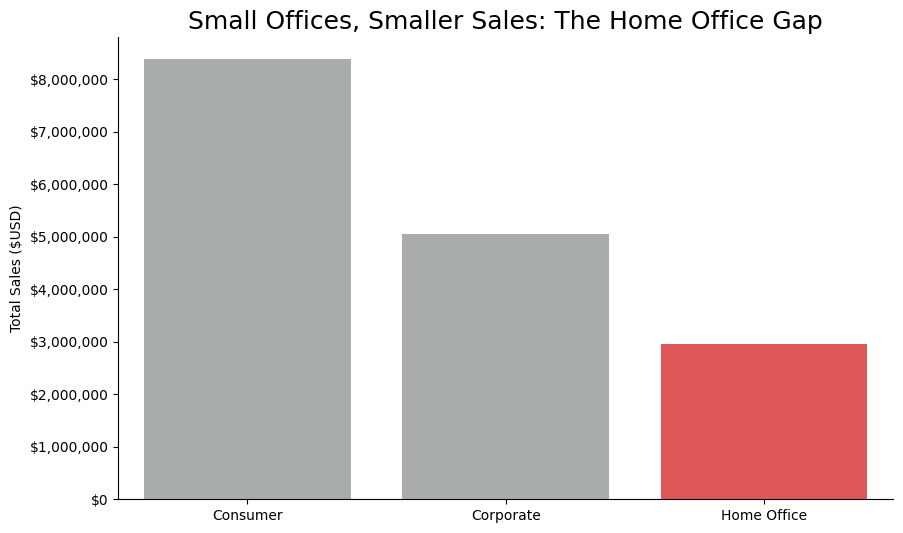

In [110]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


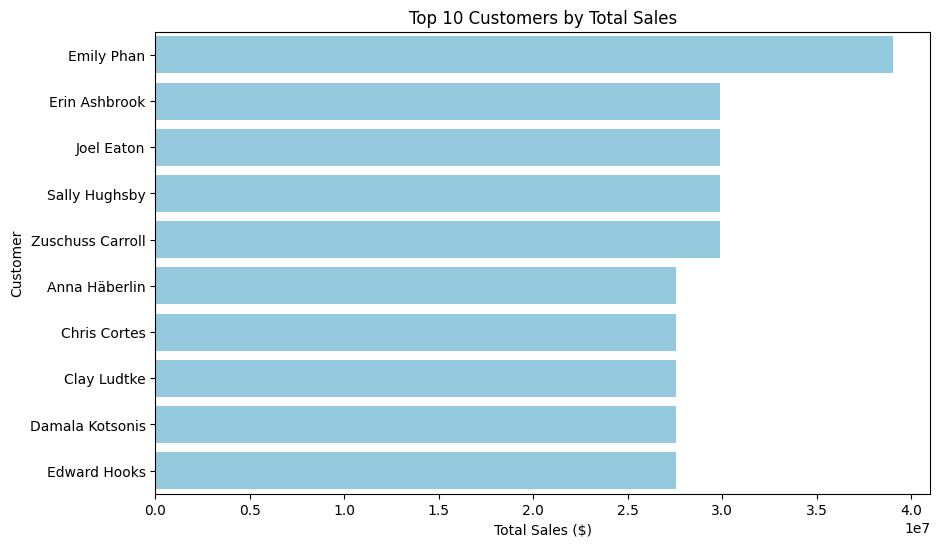

In [111]:
# Top 10 Customers by Total Sales
plt.figure(figsize=(10,6))
sns.barplot(
    data=result2,
    x='total_sales',
    y='customer_name',
    color='skyblue'
)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer')
plt.show()

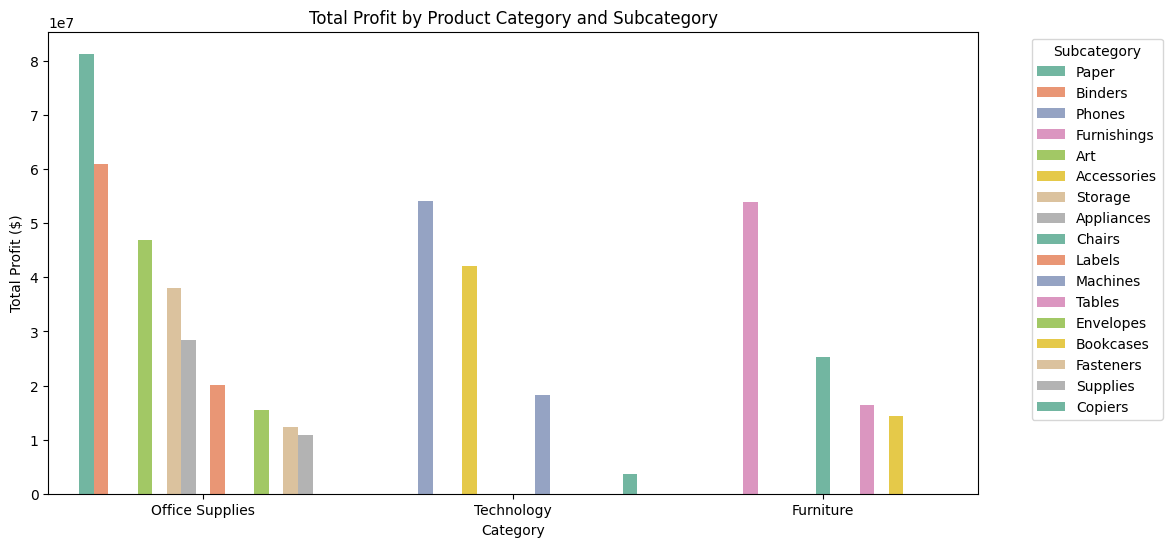

In [124]:
# Most Profitable Product Categories and Subcategories
plt.figure(figsize=(12,6))
sns.barplot(
    data=result3,
    x='category',
    y='total_profit',
    hue='subcategory',
    palette='Set2'
)
plt.title('Total Profit by Product Category and Subcategory')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


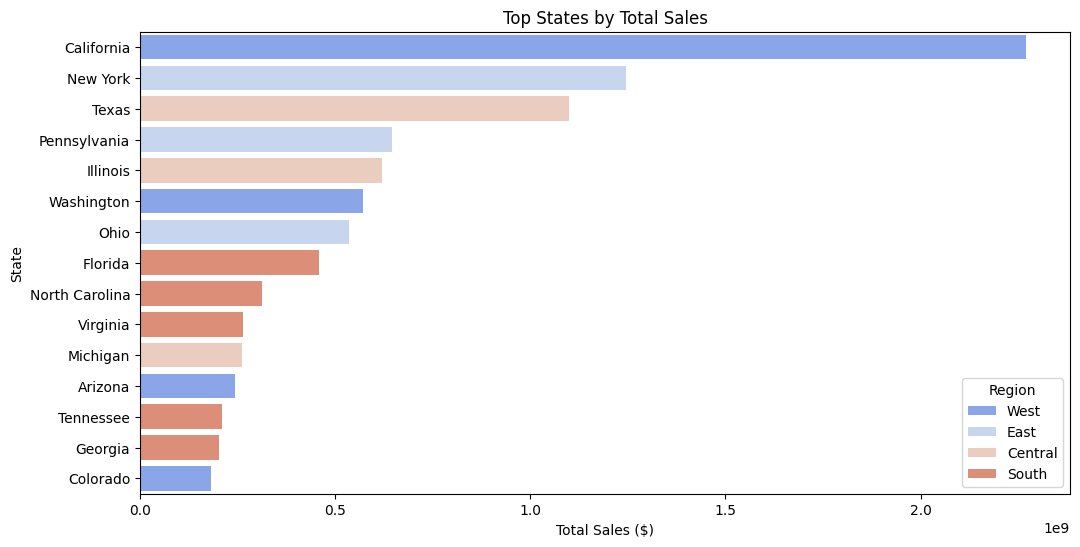

In [113]:
# Sales by State or Region
plt.figure(figsize=(12,6))
sns.barplot(
    data=result5.head(15),  # top 15 for clarity
    x='total_sales',
    y='state',
    hue='region',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top States by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('State')
plt.legend(title='Region')
plt.show()

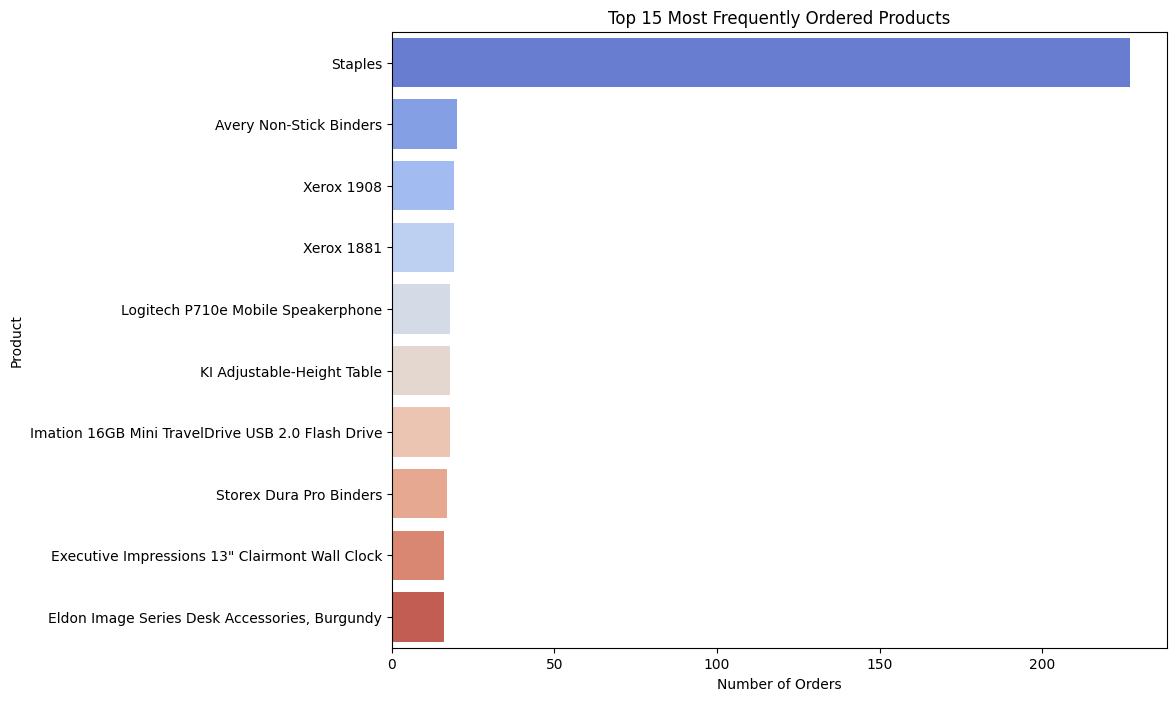

In [114]:
# Most Frequently Ordered Products
plt.figure(figsize=(10,8))
sns.barplot(
    data=result8,
    x='order_count',
    y='product_name',
    hue='product_name',
    palette='coolwarm',
    dodge=False
)
plt.title('Top 15 Most Frequently Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.show()
